In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
data_set = pd.read_csv("USA_Housing.csv")

In [3]:
data_set.head(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025


In [4]:
data_set.isnull()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False


In [10]:
data_set.count()

Avg. Area Income                5000
Avg. Area House Age             5000
Avg. Area Number of Rooms       5000
Avg. Area Number of Bedrooms    5000
Area Population                 5000
Price                           5000
Address                         5000
dtype: int64

In [11]:
data_set.size

35000

In [12]:
data_set.shape

(5000, 7)

In [13]:
data_set.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [23]:
x = data_set.iloc[:,:5].values
y = data_set.iloc[:,-2].values

In [25]:
x

array([[7.95454586e+04, 5.68286132e+00, 7.00918814e+00, 4.09000000e+00,
        2.30868005e+04],
       [7.92486425e+04, 6.00289981e+00, 6.73082102e+00, 3.09000000e+00,
        4.01730722e+04],
       [6.12870672e+04, 5.86588984e+00, 8.51272743e+00, 5.13000000e+00,
        3.68821594e+04],
       ...,
       [6.33906869e+04, 7.25059061e+00, 4.80508098e+00, 2.13000000e+00,
        3.32661455e+04],
       [6.80013312e+04, 5.53438842e+00, 7.13014386e+00, 5.44000000e+00,
        4.26256202e+04],
       [6.55105818e+04, 5.99230531e+00, 6.79233610e+00, 4.07000000e+00,
        4.65012838e+04]])

In [26]:
y

array([1059033.55787012, 1505890.91484695, 1058987.98787608, ...,
       1030729.58315229, 1198656.87240769, 1298950.48026696])

In [27]:
# Splitting the dataset into training and test set.

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)  

In [28]:
regressor= LinearRegression()  
regressor.fit(x_train, y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
y_pred= regressor.predict(x_test)  

In [30]:
x_test

array([[6.12007262e+04, 5.29969400e+00, 6.23461464e+00, 4.23000000e+00,
        4.27896922e+04],
       [6.33808147e+04, 5.34466404e+00, 6.00157433e+00, 2.45000000e+00,
        4.02173336e+04],
       [7.12082693e+04, 5.30032605e+00, 6.07798886e+00, 4.01000000e+00,
        2.56963617e+04],
       ...,
       [4.94242671e+04, 7.05347343e+00, 5.11095639e+00, 2.27000000e+00,
        1.86566424e+04],
       [7.01385126e+04, 6.31945652e+00, 6.59978918e+00, 4.37000000e+00,
        3.34341126e+04],
       [6.98355640e+04, 6.41984303e+00, 7.67098283e+00, 3.03000000e+00,
        1.93763189e+04]])

In [31]:
y_pred

array([ 971305.21715608,  954717.19848531,  907561.6278677 ,
        493251.3660301 ,  717846.54075547, 1050147.83569698,
        712749.72523183,  786730.40828343, 1804401.07723593,
       1538824.53251428,  743185.11443061, 1145962.64546521,
       2121930.18782602,  974081.46956713, 1152109.89196307,
        875083.71232261, 1105054.72869025,  801503.12505157,
       1205004.32935633, 1408921.3156764 , 1140508.64862882,
       1063287.89778613, 1436698.66412545, 1176185.01193258,
       1297298.51186774, 1120654.6510137 , 1118341.02405179,
       1372882.33712614, 1589401.18137736, 1194289.31191161,
       1562677.3593151 , 2007793.98911822,  891709.1598112 ,
       1326060.1620098 , 1184356.85325294,  749141.6880648 ,
       1082944.09149538, 1579298.12680236, 1260383.57184625,
       1334423.40010867, 1596862.94057488,  961444.396843  ,
       1219893.21685596, 1115884.15833126, 1034764.41129297,
       1702297.11629029, 1016847.82240761, 1618322.21832269,
       1153795.04960932,

In [32]:
y_test

array([ 894251.06863578,  932979.36062132,  920747.91128789,
        691854.921027  ,  732733.23629305,  945252.19180382,
        624482.76358665,  849566.08554459, 1544379.74773568,
       1535262.44079042,  568842.53557536, 1137523.11087169,
       2092949.86134061,  985749.78735653, 1265180.90891648,
        814240.28159835,  998773.99725848,  810537.14839216,
        978312.74841913, 1535946.64311382, 1057252.5826211 ,
       1031146.75455453, 1599634.46503679, 1086716.79570865,
       1168845.81517368, 1192677.55002104, 1064371.76412005,
       1377275.17877252, 1479295.57093729, 1182335.67965011,
       1545864.1664835 , 2105991.79156421,  809486.70992795,
       1464929.16219034, 1411054.31694068,  758262.61211065,
       1205114.23020705, 1684554.71545285, 1234629.59549004,
       1295945.61684099, 1735340.25568655,  943854.72789733,
       1103485.70726409, 1129408.87012587,  868314.47356254,
       1649947.15975202, 1131618.91336484, 1786085.750543  ,
       1214320.57436406,

In [33]:
#Now compare the actual output values for x_test with the predicted values, execute the following script:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,8.942511e+05,9.713052e+05
1,9.329794e+05,9.547172e+05
2,9.207479e+05,9.075616e+05
3,6.918549e+05,4.932514e+05
4,7.327332e+05,7.178465e+05
...,...,...
995,7.549606e+05,8.391244e+05
996,1.205568e+06,1.142525e+06
997,6.682555e+05,4.986132e+05
998,1.398760e+06,1.235228e+06


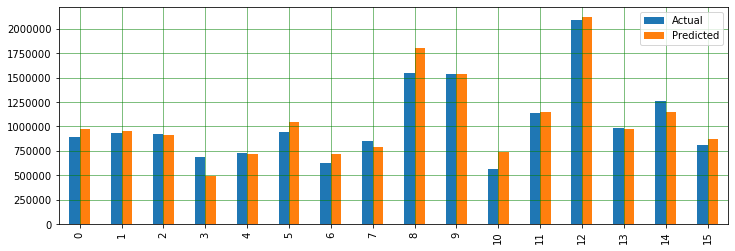

In [35]:
#We can also visualize comparison result as a bar graph.
df1 = df[0:16]
df1.plot(kind='bar',figsize=(12,4))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [36]:
print('Train Score: ', regressor.score(x_train, y_train))  
print('Test Score: ', regressor.score(x_test, y_test))  

Train Score:  0.918840114090963
Test Score:  0.9146454505137889


In [37]:
EXTRAS:_

#To retrieve the intercept:
print(f"Intercept : {regressor.intercept_}")

#For retrieving the slope:
print(f"Slope : {regressor.coef_}")

Intercept : -2646630.531056965
Slope : [2.16604083e+01 1.65809651e+05 1.20329408e+05 2.19309558e+03
 1.52858855e+01]


In [38]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 82657.94605892805
Mean Squared Error: 10549721686.16152
Root Mean Squared Error: 102711.83810136745


In [39]:
data_set.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [41]:
regressor.predict([[98000,10,7,3,25000]])

array([2365218.27432102])